In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# Question 1
# A
Consider the function $f(x)=x^3 -9x^2 +11x-11$, which has a root in the interval $(-10,10)$. Calculate by hand the first 3 iterations of Newton's method to estimate the root of $f(x)$, using the initial guess $x_0=0$. What happens?

---------------------------------------
## Solution
Starting with the initial guess $x_0=0$, the first three iterations using Newton's method are
\begin{align}
	x_1 &= 0 - \frac{-11}{11} = 1 \\
	x_2 &= 1 - \frac{1^3-9\cdot1^2+11\cdot1-11}{3\cdot1^2-18\cdot1+11} = 1-\frac{-8}{-4} = -1 \\
	x_3 &= -1 - \frac{(-1)^3-9(-1)^2+11(-1)-11}{3(-1)^2-18(-1)+11} = -1 - \frac{-32}{32} = 0 = x_0
\end{align}
Computing the first three iterates we find that Newton's method with $x_0=0$ results in a cycle with period 3.

# B
Write a python code that uses bisection to determine a better choice of $x_0$, then feed this new initial guess to a Newton's method solver. Iterate your Newton's method solver until you have found the root of $f(x)$ to within a tolerance of $\epsilon=10^{-6}$, and report the value of the root.

In [ ]:
# ====== bisection method followed by Newton's method ======
def f(x):
    return x**3 - 9*x**2 + 11*x - 11
def df(x):
    return 3*x**2 - 18*x + 11

# ------ endpoints, max iterations, and tolerance ------
a=-10 #left endpoint
b=10 #right endpoint
N=25 #max iterations for bisection & newton's
tol=(b-1)/2 #very broad tolerance for bisection. NOTE: this was chosen aftercomputing bisection by hand
            #until the subinterval no longer contained -1, 0, or 1. See text below

# ------ bisection (Burden & Faires Numerical Analysis 9th ed) ------
i=1
FA=f(a)
while i<=N:
    p = a + (b-a)/2
    FP=f(p)
    if FP==0 or (b-a)/2<tol: break #return p=x0 for newton's
    i+=1
    if FA*FP>0:
        a=p
        FA=FP
    else:
        b=p

print('Bisection complete. Using x0 =',p,'as initial guess for Newton\'s method')

# ------ newton's method adapted from Lab 2 ------
tol=10**(-6) #update tolerance
x=p #switch from p to x so notation is familiar

# ------ compute x_1 directly so we can do 1st comparison ------
xn = x - f(x)/df(x)
i=1 #initialize an iteration counter

while abs(xn-x)>tol and i<=N:
    x=xn
    xn = x - f(x)/df(x)
    i+=1
print('Convergence for Newton\'s method was achieved using',i,'iterations')
print('The root of f(x) is',x)

Bisection complete. Using x0 = 7.5 as initial guess for Newton's method
Convergence for Newton's method was achieved using 4 iterations
The root of f(x) is 7.765951540351796


# Question 2
# A
Derive a third order method for solving $f(x) = 0$ in a way similar to the derivation of Newton’s method, using evaluations of $f(x_n)$, $f’(x_n)$, and $f’’(x_n)$. Show that in the course of derivation, a quadratic equation arises, and therefore two distinct schemes can be derived. **Hint: Expand $f(x)$ around $x_n$.**

---------------------------------------
## Solution
Expand $f(x)$ around $x_n$ to get
$$ f(x) = f(x_n) + (x - x_n)f'(x_n) + \frac{(x - x_n)^2}{2}f''(x_n) + O((x - x_n)^3). $$
Set $x = \hat{x}$ and use $f(\hat{x})=0$ to get
$$ 0 = f(x_n) + (\hat{x} - x_n)f'(x_n) + \frac{(\hat{x} - x_n)^2}{2}f''(x_n) + O((\hat{x} - x_n)^3). $$
Solving for $\hat{x}$, we have
$$\frac{1}{2}f''(x_n) \hat{x}^2 + (f'(x_n) - x_n f''(x_n))\hat{x} + f(x_n) - x_n f'(x_n) + \frac{x_n^2}{2}f''(x_n) = O((\hat{x} - x_n)^3).$$
Setting the right hand side to zero, we find two solutions for $\hat{x}$,
\begin{equation}
\hat{x} =  x_n - \frac{f'(x_n)}{f''(x_n)}\left[1 \pm \sqrt{1 - \frac{2 f''(x_n) f(x_n)}{f'(x_n)^2}}\right].
\end{equation}
**There is one valid solution if we require $x_n \to \hat{x}$ as $f(x_n)\to 0$.** To see this, set $f(x_n)=0$ in the above equation and solve for $y=\hat{x}-x_n$. Only one of the two solutions is zero (assuming that $f'(\hat{x}) \neq 0$). This might seem counter intuitive, but it is not once you look at it in simpler terms. There are two (possibly complex) roots of the polynomial $ax^2 + bx + c = 0$ (assuming $a \neq 0$), but only one of them will vanish as $c\to 0$ (assuming $b \neq 0$).

Hence,
\begin{equation}
\hat{x} =  x_n - \frac{f'(x_n)}{f''(x_n)}\left[1 - \sqrt{1 - \frac{2 f''(x_n) f(x_n)}{f'(x_n)^2}}\right]  + O((\hat{x} - x_n)^3).
\end{equation}
Using the above, we propose the fixed point iteration
$$ x_{n+1} = g(x_n) = x_n - \frac{f'(x_n)}{f''(x_n)}\left[1 - \sqrt{1 - \frac{2 f''(x_n) f(x_n)}{f'(x_n)^2}}\right]$$

------------------------------------------------------------------------------------------
**Comment:** The above is sufficient for full credit. However, one can futher simplify the method by expanding the square root term around $y = 0$, where $y = f(x_n)$. Assuming that $\hat{x}$ is a simple root, we have $f(x_n) = O(x_n - \hat{x})$, $f'(x_n) = O(1)$, and $f''(x_n) = O(1)$. To maintain the same accuracy, we need to expand the square root to explicitly include $O(y^2)$ terms. The $O(y^3)$ terms can be ignored and the same accuracy will be maintained. This leads to the iteration formula
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} -  \frac{f''(x_n)f(x_n)^2}{f'(x_n)^3}.$$
One can show that the above iteration method also has cubic convergence.

# B
Show that the order of convergence (under appropriate conditions) is cubic.

---------------------------------------
## Solution
From the solution of part A we have
\begin{equation}
\hat{x} =  x_n - \frac{f'(x_n)}{f''(x_n)}\left[1 - \sqrt{1 - \frac{2 f''(x_n) f(x_n)}{f'(x_n)^2}}\right]  + O((\hat{x} - x_n)^3),
\end{equation}
and
$$ x_{n+1} = g(x_n) = x_n - \frac{f'(x_n)}{f''(x_n)}\left[1 - \sqrt{1 - \frac{2 f''(x_n) f(x_n)}{f'(x_n)^2}}\right].$$
Taking the difference of the above two equation yields
$$ \vert x_{n+1} - \hat{x} \vert = O((\hat{x} - x_n)^3). $$

# C
Implement the root-finding method in Python to compute the root of $f(x) = x^3 - 2$. Add a stopping criterion that requires $\vert f(x_n) \vert \leq 10^{-8}$. Save the value of $x_n$ at each iteration and create a plot showing the convergence rate.

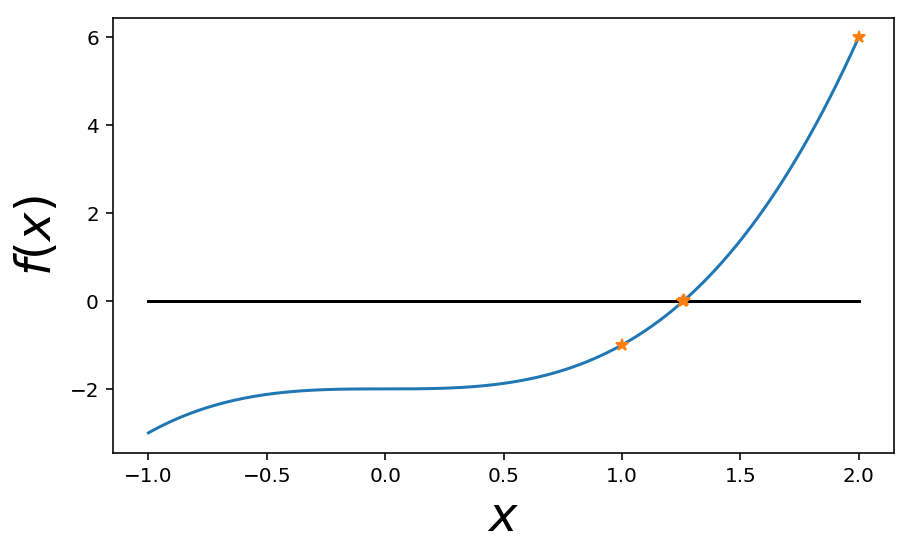

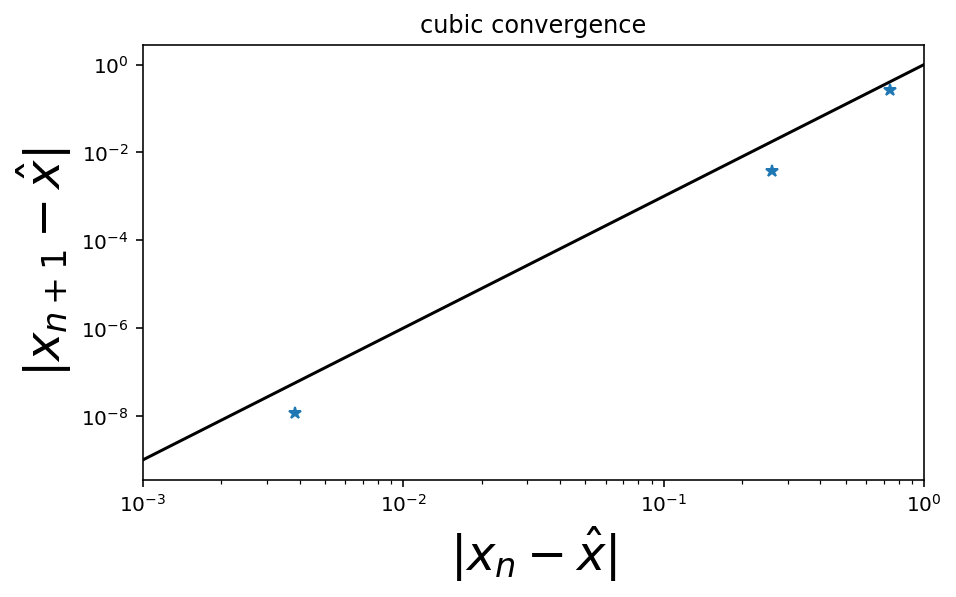

In [ ]:
## parameters

max_steps = 50 ## max number of iterations to use
tol = 1e-8 ## 10^(-8)
x0 = 2.
xhat = 2.**(1/3.)

def f(x):
    return x**3 - 2.
def fp(x):
    return 3*x**2
def fpp(x):
    return 6*x

x = [x0]
for j in arange(max_steps):
    fj = f(x[j])
    fpj = fp(x[j])
    fppj = fpp(x[j])
    x.append(x[j] - fpj/fppj*(1 - sqrt(1 - 2*fppj*fj/fpj**2)))
    if absolute(fj) < tol:
        break ## this will stop the for loop

x = array(x) ## convert the list into an array

figure(1, [7, 4])
xplot = linspace(-1, 2, 200)
plot(xplot, 0*xplot, 'k') ## plot the line y=0
plot(xplot, f(xplot)) ## plot f(x)
plot(x, f(x), '*') ## plot the iterates of bisection
xlabel(r'$x$', fontsize=24) ## x axis label
ylabel(r'$f(x)$', fontsize=24); ## y axis label

## Convergence plot
figure(2, [7, 4])
err = absolute(x - xhat)
loglog(err[:-1], err[1:], '*') ## plot the iterates of bisection
err_plot = array([1e-3, 1e-2, 1e-1, 1.])
conv = err_plot**3  # quadratic. the theoretecal convergence curve
loglog(err_plot, conv, 'k')
xlim(1e-3, 1)
xlabel(r'$\vert x_n - \hat{x}\vert$', fontsize=24) ## x axis label
ylabel(r'$\vert x_{n+1} - \hat{x}\vert$', fontsize=24) ## y axis label
title('cubic convergence');

# Question 3
Consider the function
$$ g(x) = \tan^{-1}(x) - x, $$
which has a single root $\hat{x}=0$.

# A
Use Newton's method to solve for the root using the initial guess $x_0 = 0.1$. How many iterations are required before the solution ceases to change? What is the absolute error once the iteration converges? Note that the Python function for $\tan^{-1}(x)$ is `arctan()`.

In [ ]:
## Part A
Nsteps = 40
x0 = 0.1

def f(x):
    return arctan(x) - x
def fprime(x):
    return 1./(1. + x**2) - 1.

x = x0
for j in arange(Nsteps):
    x = x - f(x)/fprime(x)
    print(x)

## Answer: 40 iterations

0.06653390160736532
0.04431673810993909
0.029532896911958505
0.019685164776945954
0.013122426271662612
0.008747982915804507
0.0058318993522939
0.0038879064553848383
0.002591929801102944
0.001727950879035258
0.0011519665647577338
0.0007679775060449436
0.0005119849436409096
0.00034132327788272886
0.00022754884662874543
0.00015169922947858496
0.00010113281919333074
6.742187938878361e-05
4.494791911206197e-05
2.996528004560158e-05
1.997685302808493e-05
1.331789626307176e-05
8.878601400498102e-06
5.919075327461899e-06
3.946063595429965e-06
2.6306901361335727e-06
1.7537883310329756e-06
1.1692049769609665e-06
7.794949590824339e-07
5.196396217721783e-07
3.4631558893847664e-07
2.3063842648549632e-07
1.5414579902374503e-07
1.0289694557200729e-07
6.936933288585006e-08
4.7694916603889835e-08
3.279375541004218e-08
2.0872826454964053e-08
1.3422245858040224e-08
1.3422245858040224e-08


# B
You should notice that the absolute error found in part A is approximately $10^{-8}$, which means that the solution has roughly 8 digits of accuracy. This is half the number of digits of accuracy that we should expect using `float64` numbers. The reason is that $g'(0) = 0$. In addition to causing Newton's method to converge linearly, a repeated root makes the method more sensitive to rounding error.

Let us model the effect of rounding error for a typical case of root finding (where we do **not** have a repeated root like in part A). Suppose that due to rounding error, we are solving the perturbed problem
$$ f(x) - \epsilon = 0 ,$$
where $\epsilon = 10^{-16}$ and represents machine epsilon for `float64` numbers. For simplicity, assume that there is a single root of the function $f$ at $\hat{x}=0$. Compute a Taylor series expansion of $f(x)$ around $x=0$ and assume that $f'(0) \neq 0$. Using the Taylor series expansion of $f$, derive an approximation to the solution to $f(x) - \epsilon = 0$. *Hint: your solution should be of the form $\hat{x}(\epsilon) = C\epsilon + O(\epsilon^2)$. You need to determine the constant $C$.*

---------------------------------------
## Solution

Taylor expanding $f$ around $x=0$ and substituting into the equation yields
$$ f(0) + xf'(0) + \frac{x^2}{2}f''(0) + O(x^3) - \epsilon = 0. $$
Using $f(0) = 0$ yields
$$ \left[xf'(0) + \frac{x^2}{2}f''(0) + O(x^3)\right] - \epsilon = 0. $$
Now we substitute $\hat{x}(\epsilon) = C\epsilon$ into the above equation to get
$$ \left[C \epsilon f'(0) + \frac{1}{2}f''(0)C^2 \epsilon^2 + O(\epsilon^3)\right] - \epsilon = 0. $$
Eliminating terms that are $O(\epsilon^2)$ yields
$$ C \epsilon f'(0) - \epsilon = 0 $$
$$ \Rightarrow C f'(0) - 1 = 0. $$
And since we can assume that $f'(0) \neq 0$ we have
$$ C  = 1/f'(0) . $$
Hence,
$\hat{x}(\epsilon) = (1/f'(0))\epsilon + O(\epsilon^2)$.

**We can conclude that $\vert 1/f'(0)\vert $ is the condition number for this problem.**

# C [Extra Credit]
Repeat part B, but now assume that $f'(0) = 0$ and $f''(0) \neq 0$. *Hint: your solution should be of the form $\hat{x}(\epsilon) = M\epsilon^{1/2} + O(\epsilon)$.*

---------------------------------------
## Solution

Taylor expanding $f$ around $x=0$ and substituting into the equation yields
$$ f(0) + xf'(0) + \frac{x^2}{2}f''(0) + O(x^3) - \epsilon = 0. $$
Using $f(0) = f'(0) = 0$ yields
$$ \left[\frac{x^2}{2}f''(0) + O(x^3)\right] - \epsilon = 0. $$
Now we substitute $\hat{x}(\epsilon) = M\epsilon^{1/2}$ into the above equation to get
$$ \left[\frac{1}{2}f''(0)M^2 \epsilon + O(\epsilon^{3/2})\right] - \epsilon = 0. $$
Eliminating terms that are $O(\epsilon^{3/2})$ yields
$$ \frac{1}{2}f''(0)M^2 \epsilon - \epsilon = 0$$
$$ \Rightarrow\frac{1}{2}f''(0)M^2  - 1 = 0. $$
**(Note that some perturbations might result in a problem for which no (real) solution exists.)**
And since we can assume that $f''(0) \neq 0$ we have
$$ M  = \sqrt{\frac{2}{f''(0)}}. $$
Hence,
$$\text{absolute error} = \vert \hat{x}(\epsilon) \vert = \sqrt{\frac{2}{\vert f''(0)\vert}}\epsilon^{1/2} + O(\epsilon)$$.

**This problem is ill conditioned because the absolute error scales like $\epsilon^{1/2}$. One outcome is that we lose half our digits of accuracy, as shown in part A. Is this a flaw of Newton's method? Or is this a fundamental flaw of the problem itself?**